![](https://s3.ap-south-1.amazonaws.com/techleer/207.jpg)

# PLEASE UPVOTE AND COMMENT DOWN YOUR SUGGESTIONS. 

# Classification is a type of supervised learning. It specifies the class to which data elements belong to and is best used when the output has finite and discrete values. It predicts a class for an input variable as well.

There are 2 types of Classification: 

-Binomial
-Multi-Class
*Classification: Use Cases*
Some of the key areas where classification cases are being used:

1-To find whether an email received is a spam or ham


2-To identify customer segments


3-To find if a bank loan is granted


4-To identify if a kid will pass or fail in an examination


*Types of Classification Algorithms*
Let’s have a quick look into the types of Classification Algorithm below.

1-Linear Models


-`Logistic Regression


-Support Vector Machines


2-Nonlinear models


-K-nearest Neighbors (KNN)


-Kernel Support Vector Machines (SVM)


-Naïve Bayes


-Decision Tree Classification


-Random Forest Classification





# In this classification we would be predicting the gender of a person on the basis of his/her first name with the help of DecisionTreeClassifier.

In a nutshell, the flow to building this model can be visualized as:

A name => Classifier => Male/Female

In [7]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



df=pd.read_csv('../input/usa-national-names/NationalNames.csv')


# Dataset source-
 https://raw.githubusercontent.com/andela-iamao/ML-classifying-genders/master/dataset/NationalNames.csv

The dataset basically contains the first names of babies born in USA from 1880 to 2016.

Dropping the duplicate names.

In [8]:
df.drop_duplicates("Name")


,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746
...,...,...,...,...,...
1825414,1825415,Zichen,2014,M,5
1825415,1825416,Ziden,2014,M,5
1825418,1825419,Zijun,2014,M,5
1825419,1825420,Zilas,2014,M,5


In [9]:
df.columns

Index(['Id', 'Name', 'Year', 'Gender', 'Count'], dtype='object')

In [11]:
df.head

<bound method NDFrame.head of               Id       Name  Year Gender  Count
0              1       Mary  1880      F   7065
1              2       Anna  1880      F   2604
2              3       Emma  1880      F   2003
3              4  Elizabeth  1880      F   1939
4              5     Minnie  1880      F   1746
...          ...        ...   ...    ...    ...
1825428  1825429     Zykeem  2014      M      5
1825429  1825430     Zymeer  2014      M      5
1825430  1825431    Zymiere  2014      M      5
1825431  1825432      Zyran  2014      M      5
1825432  1825433      Zyrin  2014      M      5

[1825433 rows x 5 columns]>

In [12]:
df.columns

Index(['Id', 'Name', 'Year', 'Gender', 'Count'], dtype='object')

In [13]:
print(df['Gender'])
m=0
f=0
for x in range(len(df['Gender'])):
    if(df['Gender'][x]=='F'):
        f+=1
    else:
        m+=1

0          F
1          F
2          F
3          F
4          F
          ..
1825428    M
1825429    M
1825430    M
1825431    M
1825432    M
Name: Gender, Length: 1825433, dtype: object


This dataset contains naming trends for babies born in the United States and is sanitized, but we do have to perform one more cleaning operation, which is what you see on the second line.

In [14]:
print("The number of females are "+(str)(f))
print("The number of males are "+(str)(m))

The number of females are 1081683
The number of males are 743750


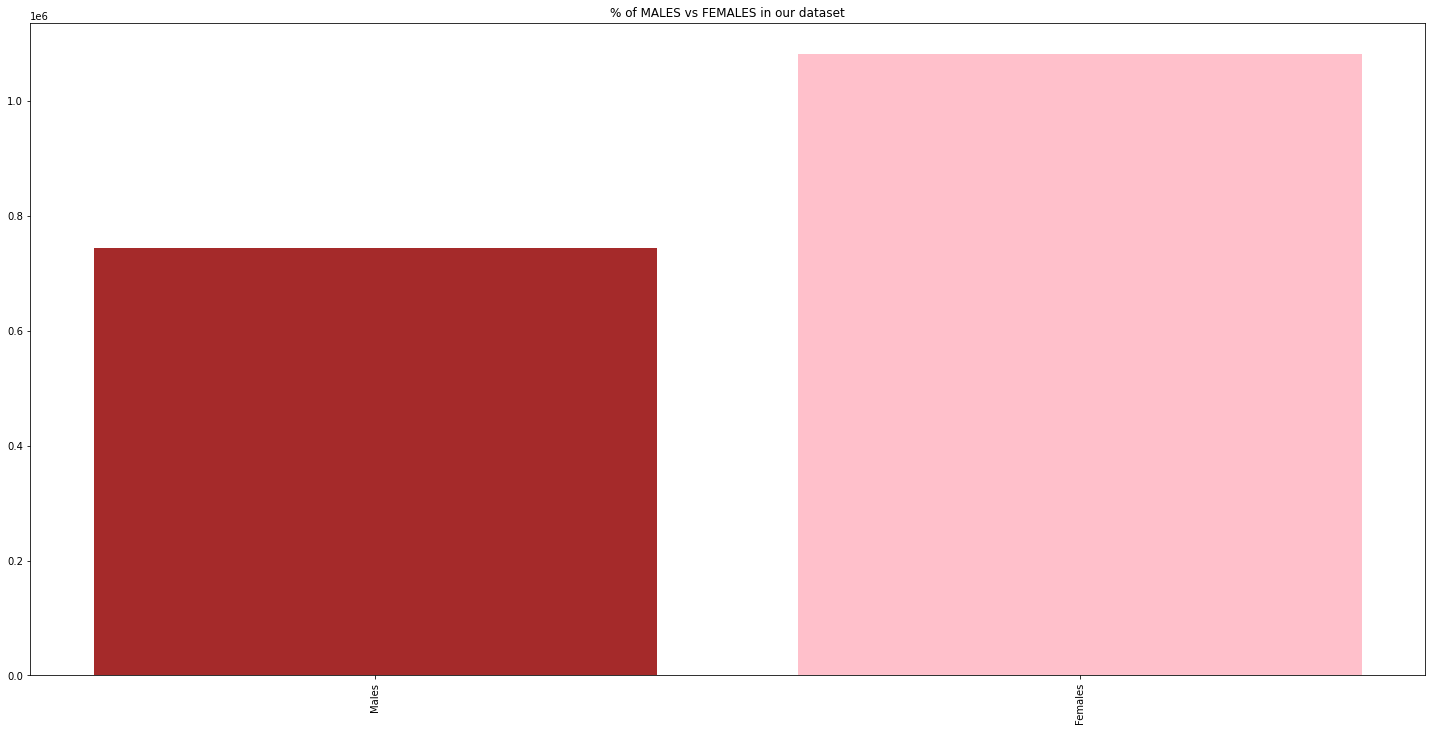

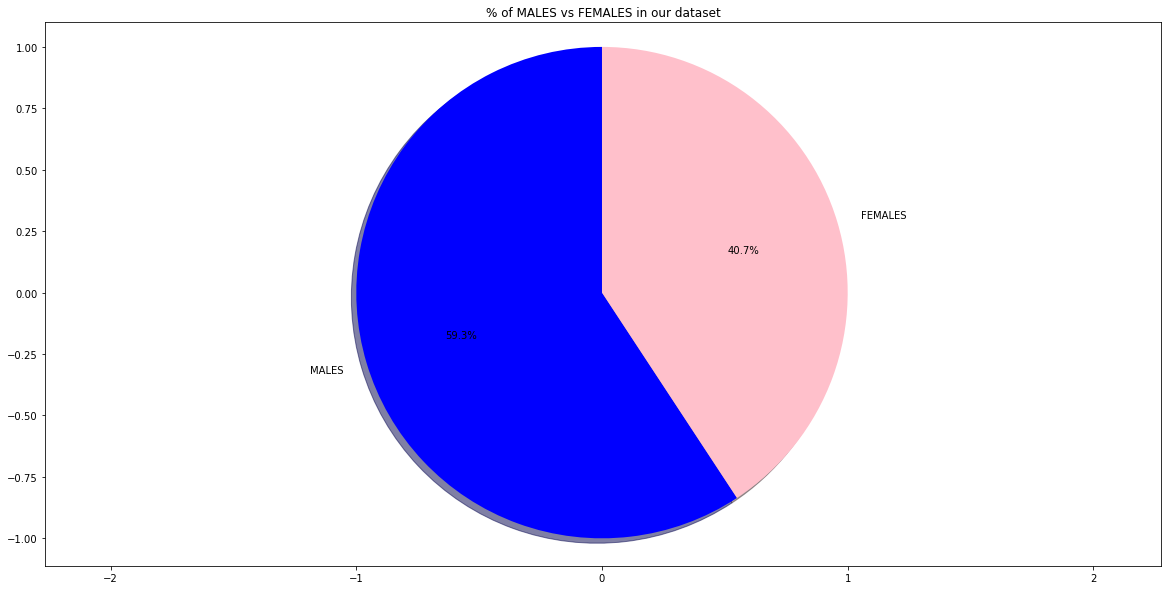

In [15]:
import matplotlib.pyplot as plt
import matplotlib as mp

fig, ax = plt.subplots(figsize=(25,12))
ax.bar(["Males","Females"],[m,f],color=['Brown','Pink'])
plt.title("% of MALES vs FEMALES in our dataset")
plt.xticks(rotation=90)
plt.show()



fig1, ax1 = plt.subplots(figsize=(20,10))
names=['MALES','FEMALES']
ax1.pie([f,m], labels=names, autopct='%1.1f%%',
        shadow=True, startangle=90,frame=True,colors=["blue","pink"])
ax1.set_title("% of MALES vs FEMALES in our dataset")

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Next, we'll select the information that we think is most relevant for our classification. What we want is to pick a column that best represents whether a name is male or female.

Unfortunately, with the existing dataset, there’s no definite way to determine whether a name is male or female, so we should go ahead and create a new column to better classify gender.
So lets look for ways on how could we diffrentiate names on basis of gender.

# A decent trend in this analysis maybe this, the names of females often tend to end with a vowel. Lets analyse this
.

In [16]:
def checkVowelEnd(name):
    if name[-1] in "aeiou":
        return "Vowel End"
    return "Consonant End"
df["Vowel/Consonant End"] = df["Name"].apply(checkVowelEnd)
df.head()

,Id,Name,Year,Gender,Count,Vowel/Consonant End
0,1,Mary,1880,F,7065,Consonant End
1,2,Anna,1880,F,2604,Vowel End
2,3,Emma,1880,F,2003,Vowel End
3,4,Elizabeth,1880,F,1939,Consonant End
4,5,Minnie,1880,F,1746,Vowel End


# The new data set looks something Like this.

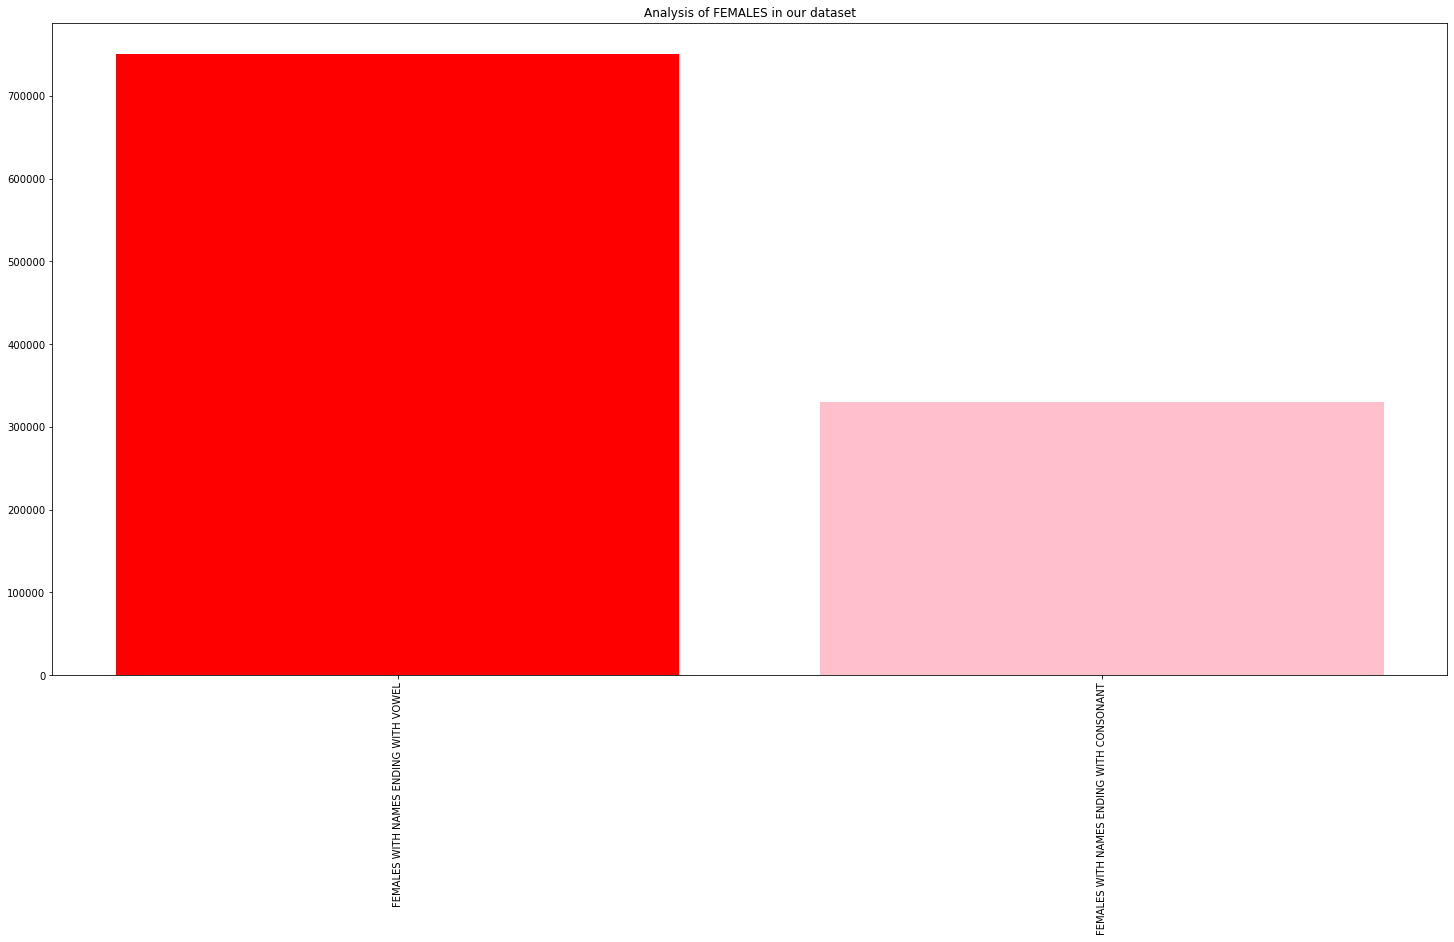

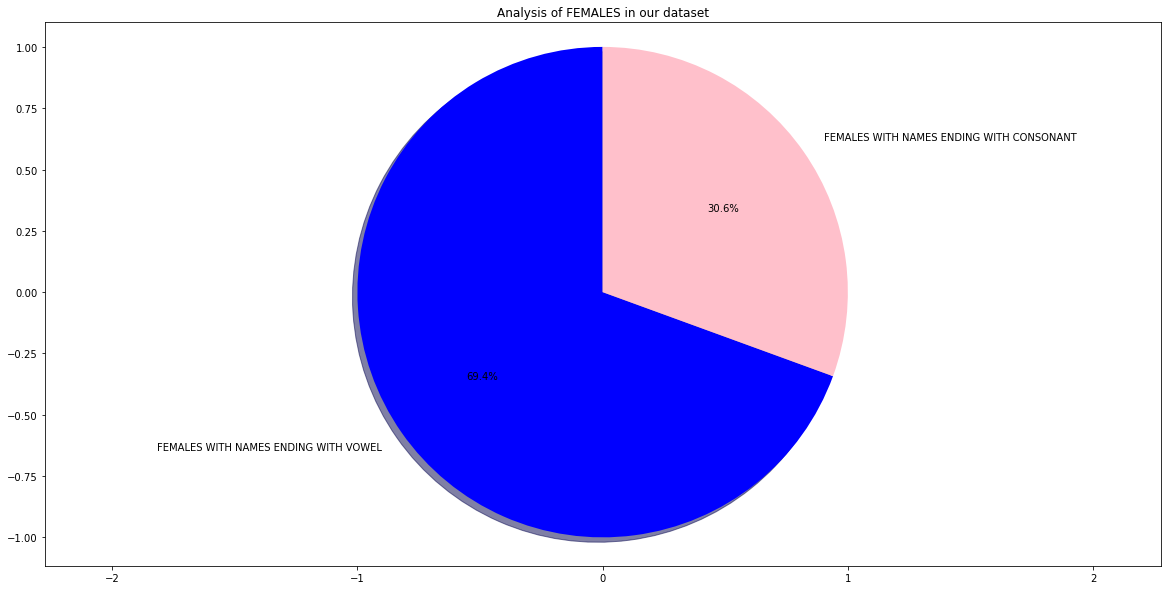

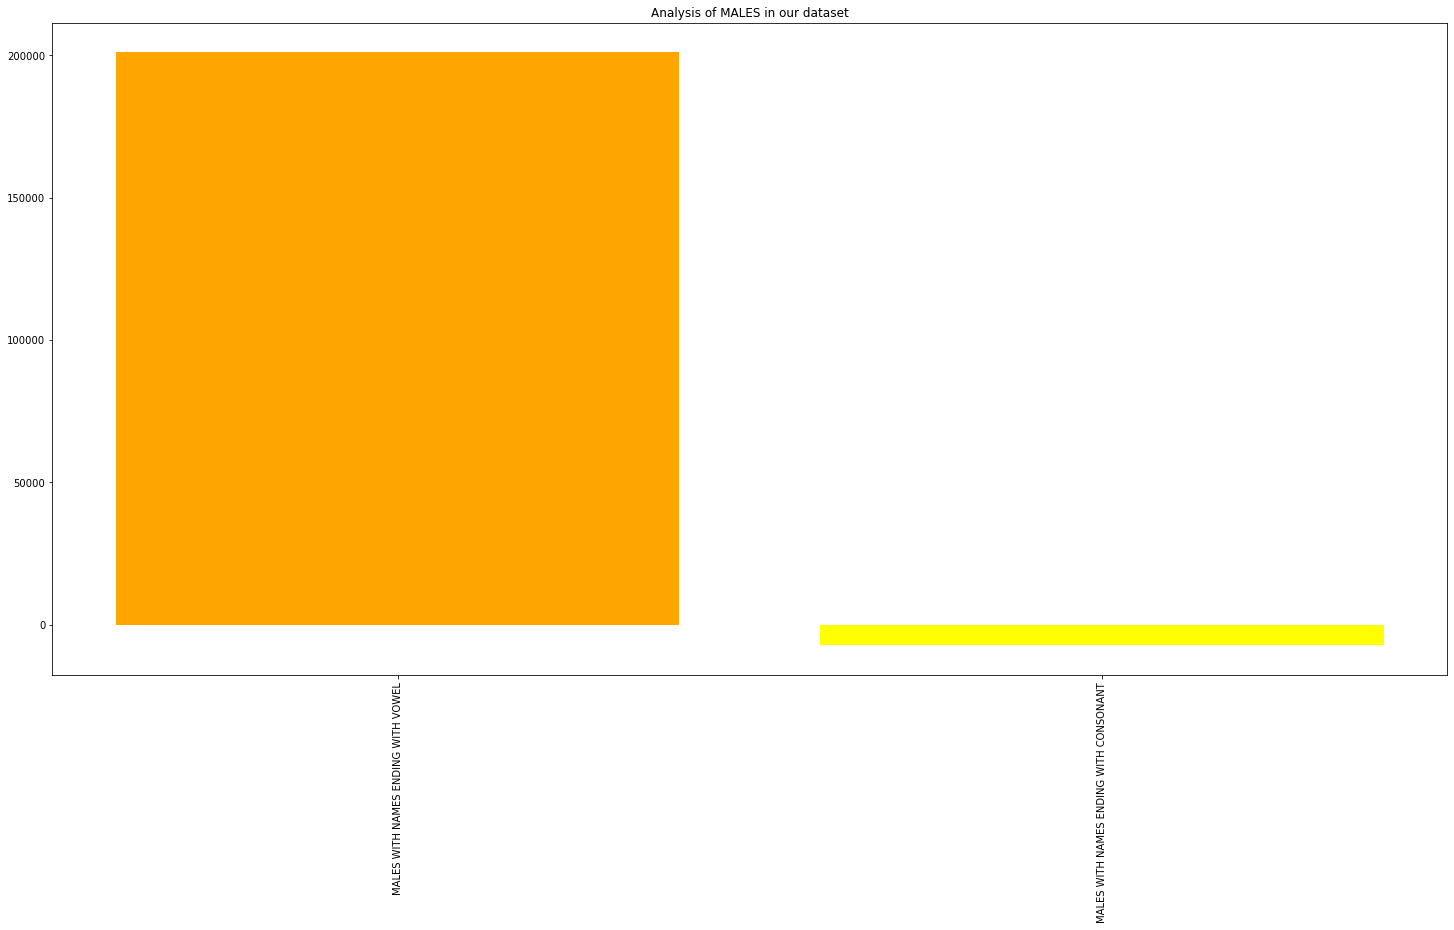

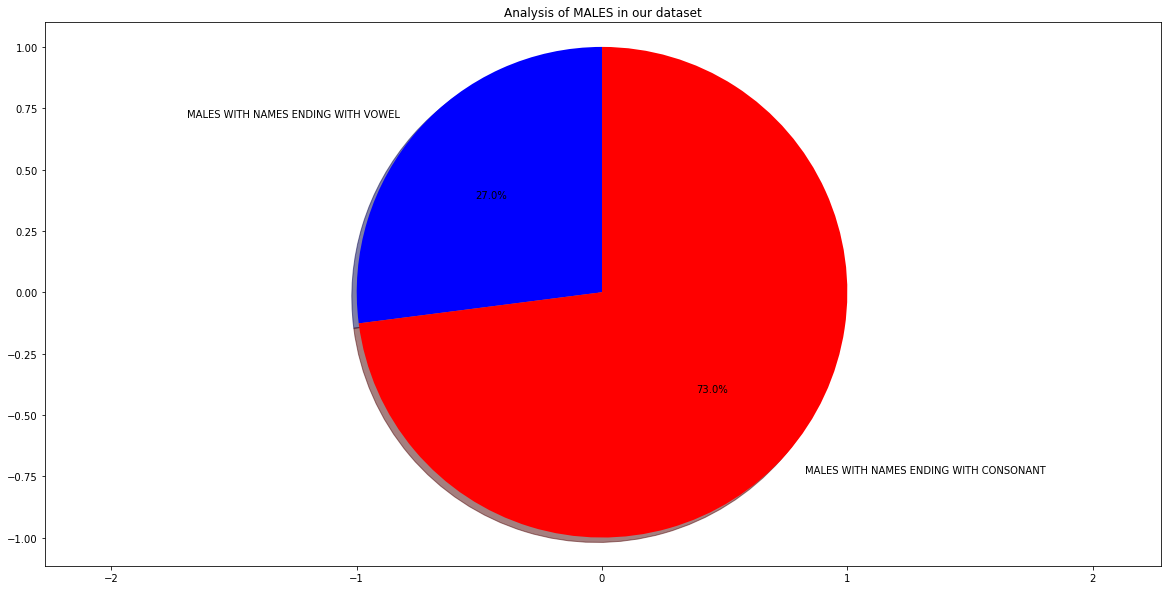

In [18]:
vend=0
mend=0
for x in range(len(df['Gender'])):
                      
    if(df['Gender'][x]=='F' and df['Vowel/Consonant End'][x]=='Vowel End'):
        vend+=1
    if(df['Gender'][x]=='M' and df['Vowel/Consonant End'][x]=='Vowel End'):
        mend+=1
import matplotlib.pyplot as plt
import matplotlib as mp


fig, ax = plt.subplots(figsize=(25,12))
ax.bar(['FEMALES WITH NAMES ENDING WITH VOWEL','FEMALES WITH NAMES ENDING WITH CONSONANT'],[vend,f-vend],color=['Red','Pink'])
plt.title("Analysis of FEMALES in our dataset")
plt.xticks(rotation=90)
plt.show()


fig1, ax1 = plt.subplots(figsize=(20,10))
names=['FEMALES WITH NAMES ENDING WITH VOWEL','FEMALES WITH NAMES ENDING WITH CONSONANT']
ax1.pie([vend,f-vend], labels=names, autopct='%1.1f%%',
        shadow=True, startangle=90,frame=True,colors=["blue","pink"])
ax1.set_title("Analysis of FEMALES in our dataset")

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()



fig, ax = plt.subplots(figsize=(25,12))
ax.bar(['MALES WITH NAMES ENDING WITH VOWEL','MALES WITH NAMES ENDING WITH CONSONANT'],[mend,m-vend],color=['Orange','Yellow'])
plt.title("Analysis of MALES in our dataset")
plt.xticks(rotation=90)
plt.show()


fig1, ax1 = plt.subplots(figsize=(20,10))
names=['MALES WITH NAMES ENDING WITH VOWEL','MALES WITH NAMES ENDING WITH CONSONANT']
ax1.pie([mend,m-mend], labels=names, autopct='%1.1f%%',
        shadow=True, startangle=90,frame=True,colors=["blue","Red"])
ax1.set_title("Analysis of MALES in our dataset")

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# We can clearly see that around 70% of females  have their names ending with a vowel and similarly 73% of males have their names ending with a consonant. So this classifying basis is quite appropriate for the analysis and predicting the gender , so we shall keep the column.

# The next we move over to the analysis of names having a vowel at start.

In [19]:
def vowelConsonantStart(name):
    
    if name[0] in "aeiou" or name[0] in "AEIOU":
        return "Vowel Start"
    return "Consonant Start"

df["Vowel/Consonant Start"] = df["Name"].apply(vowelConsonantStart)


df.head()

,Id,Name,Year,Gender,Count,Vowel/Consonant End,Vowel/Consonant Start
0,1,Mary,1880,F,7065,Consonant End,Consonant Start
1,2,Anna,1880,F,2604,Vowel End,Vowel Start
2,3,Emma,1880,F,2003,Vowel End,Vowel Start
3,4,Elizabeth,1880,F,1939,Consonant End,Vowel Start
4,5,Minnie,1880,F,1746,Vowel End,Consonant Start


The dataframe would look something like this after this analysis. 
Now lets see whether this basis is appropriate for classification or not.

In [20]:
fcnst=0
fvst=0
mvst=0
mcnst=0
for x in range(len(df['Gender'])):
                      
    if(df['Gender'][x]=='F' and df['Vowel/Consonant Start'][x]=='Consonant Start'):
        fcnst+=1
    if(df['Gender'][x]=='F' and df['Vowel/Consonant Start'][x]=='Vowel Start'):
        fvst+=1
    if(df['Gender'][x]=='M' and df['Vowel/Consonant Start'][x]=='Consonant Start'):
        mcnst+=1
    if(df['Gender'][x]=='M' and df['Vowel/Consonant Start'][x]=='Vowel Start'):
        mvst+=1
print("Males with names starting with vowels"+(str)(mvst))
print("Males with names starting with consonant"+(str)(mcnst))
print("Females with names starting with vowels"+(str)(fvst))
print("Females with names starting with consonant"+(str)(fcnst))




    
        
    

Males with names starting with vowels127331
Males with names starting with consonant616419
Females with names starting with vowels190340
Females with names starting with consonant891343


In [21]:
print("% Males with names starting with vowels    "+(str)(mvst*100/m))
print("% Males with names starting with consonant   "+(str)(mcnst*100/m))
print("% Females with names starting with vowels   "+(str)(fvst*100/f))
print("% Females with names starting with consonant   "+(str)(fcnst*100/f))

% Males with names starting with vowels    17.120134453781514
% Males with names starting with consonant   82.87986554621848
% Females with names starting with vowels   17.59665262373542
% Females with names starting with consonant   82.40334737626458


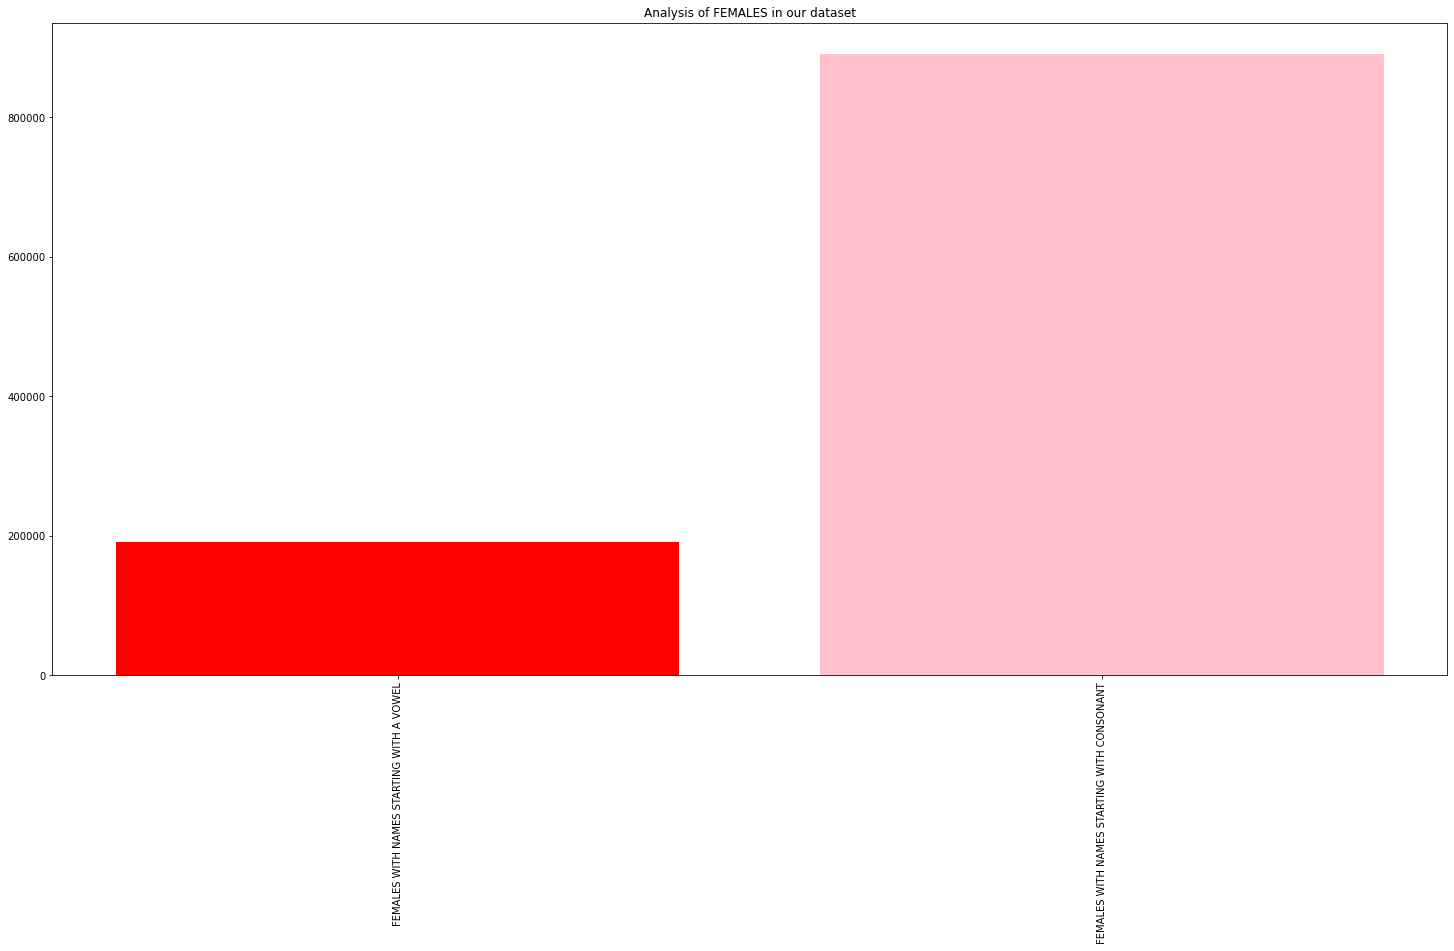

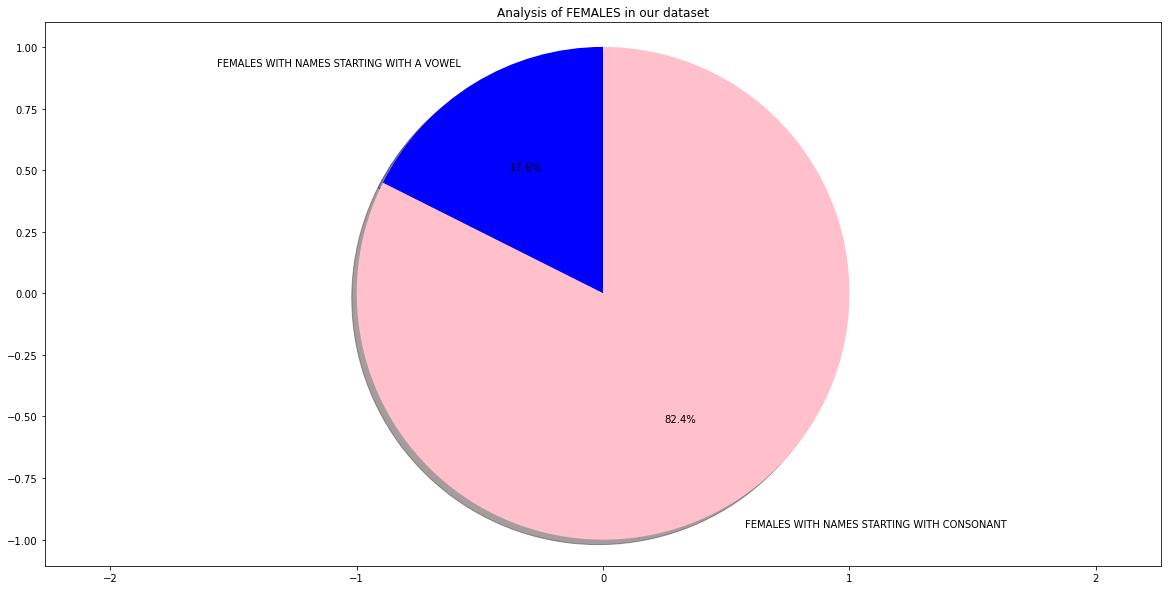

In [22]:
fig, ax = plt.subplots(figsize=(25,12))
ax.bar(['FEMALES WITH NAMES STARTING WITH A VOWEL','FEMALES WITH NAMES STARTING WITH CONSONANT'],[fvst,f-fvst],color=['Red','Pink'])
plt.title("Analysis of FEMALES in our dataset")
plt.xticks(rotation=90)
plt.show()


fig1, ax1 = plt.subplots(figsize=(20,10))
names=['FEMALES WITH NAMES STARTING WITH A VOWEL','FEMALES WITH NAMES STARTING WITH CONSONANT']
ax1.pie([fvst,f-fvst], labels=names, autopct='%1.1f%%',
        shadow=True, startangle=90,frame=True,colors=["blue","pink"])
ax1.set_title("Analysis of FEMALES in our dataset")

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

The % of consonant starting female names is quite high i.e. 82.4.

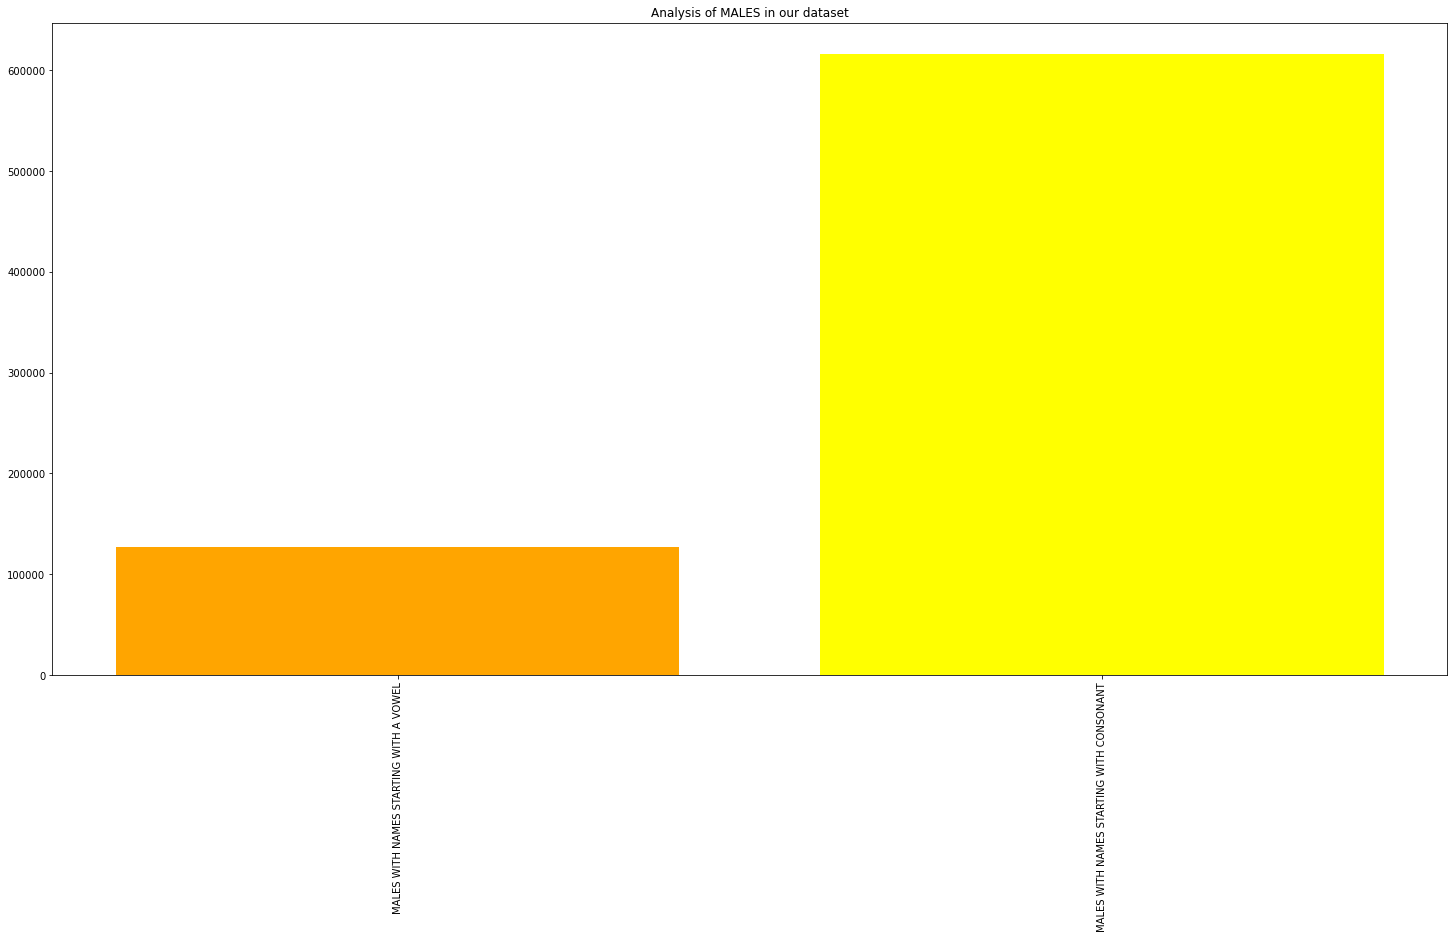

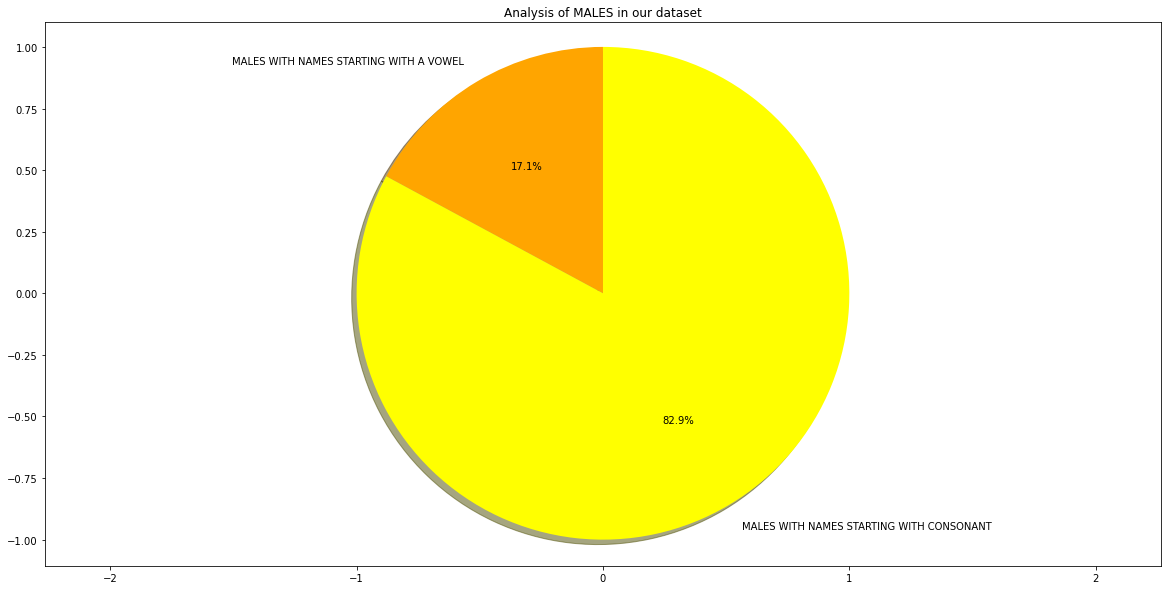

In [23]:
fig, ax = plt.subplots(figsize=(25,12))
ax.bar(['MALES WITH NAMES STARTING WITH A VOWEL','MALES WITH NAMES STARTING WITH CONSONANT'],[mvst,m-mvst],color=['Orange','Yellow'])
plt.title("Analysis of MALES in our dataset")
plt.xticks(rotation=90)
plt.show()


fig1, ax1 = plt.subplots(figsize=(20,10))
names=['MALES WITH NAMES STARTING WITH A VOWEL','MALES WITH NAMES STARTING WITH CONSONANT']
ax1.pie([mvst,m-mvst], labels=names, autopct='%1.1f%%',
        shadow=True, startangle=90,frame=True,colors=['Orange','Yellow'])
ax1.set_title("Analysis of MALES in our dataset")

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

The % of consonant starting male names is quite high i.e. 82.9  and that of females is also around 80% so we tend to drop this basis of classification.

This basis of classification may not be appropriate for the analysis but once we are done , we shall use this too cause it might shoot up the accuracy.
# But currently we will not be using this basis for our classification

# One last basis could be the length of the names.

Femals names are mostly short in length as compared to male names. Lets check.

In [24]:
avg_length=0
for x in df['Name']:
    avg_length=avg_length+len(x)
avg_length=avg_length/len(df['Name'])
print(" The average length of names for our dataset is:-"+(str)(avg_length))

 The average length of names for our dataset is:-6.174095680312561


Lest keep the markdown basis at 7.

In [25]:
vsl=0
msl=0
def shortLongName(name):
    if len(name) < 7:
        return "Short"
    return "Long"

df["Short/Long Name"] = df["Name"].apply(shortLongName)






        

The dataFrame would look something like this.

In [26]:
df

,Id,Name,Year,Gender,Count,Vowel/Consonant End,Vowel/Consonant Start,Short/Long Name
0,1,Mary,1880,F,7065,Consonant End,Consonant Start,Short
1,2,Anna,1880,F,2604,Vowel End,Vowel Start,Short
2,3,Emma,1880,F,2003,Vowel End,Vowel Start,Short
3,4,Elizabeth,1880,F,1939,Consonant End,Vowel Start,Long
4,5,Minnie,1880,F,1746,Vowel End,Consonant Start,Short
...,...,...,...,...,...,...,...,...
1825428,1825429,Zykeem,2014,M,5,Consonant End,Consonant Start,Short
1825429,1825430,Zymeer,2014,M,5,Consonant End,Consonant Start,Short
1825430,1825431,Zymiere,2014,M,5,Vowel End,Consonant Start,Long
1825431,1825432,Zyran,2014,M,5,Consonant End,Consonant Start,Short


In [27]:
for x in range(len(df['Gender'])):
    if(df['Gender'][x]=='F' and df['Short/Long Name'][x]=="Short" ):
        vsl+=1
    if(df['Gender'][x]=='M' and df['Short/Long Name'][x]=="Short" ):
        msl+=1
print("Males with length of name above 7 = "+(str)(m-msl))
print("Males with length of name less than 7 = "+(str)(msl))
print("FeMales with length of name above 7 = "+(str)(f-vsl))
print("FeMales with length of name less than 7 = "+(str)(vsl))


Males with length of name above 7 = 247712
Males with length of name less than 7 = 496038
FeMales with length of name above 7 = 465643
FeMales with length of name less than 7 = 616040


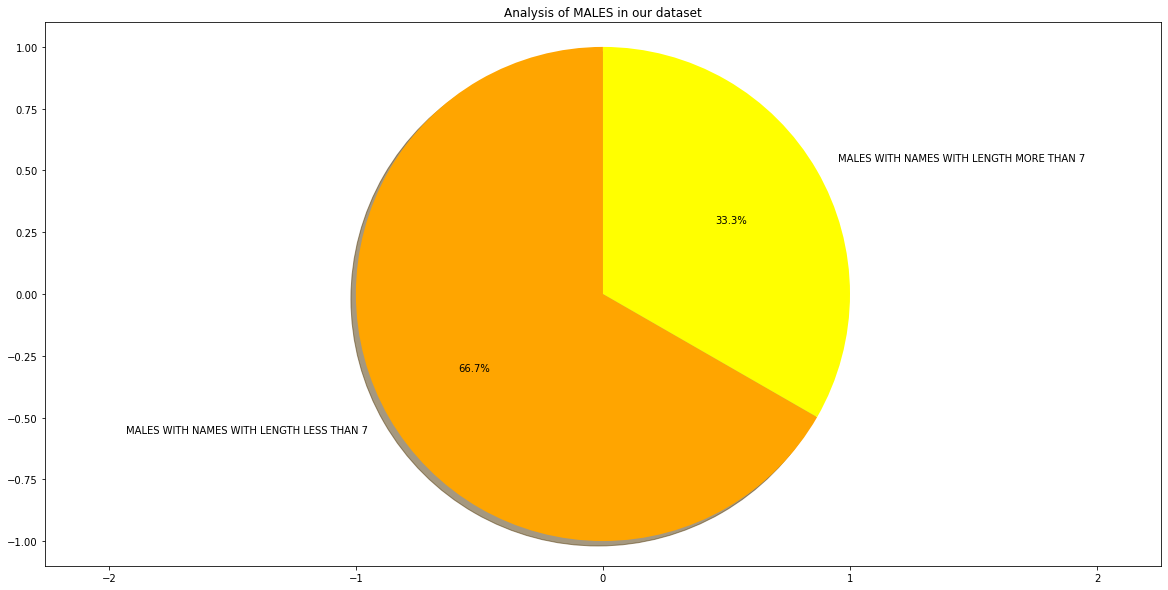

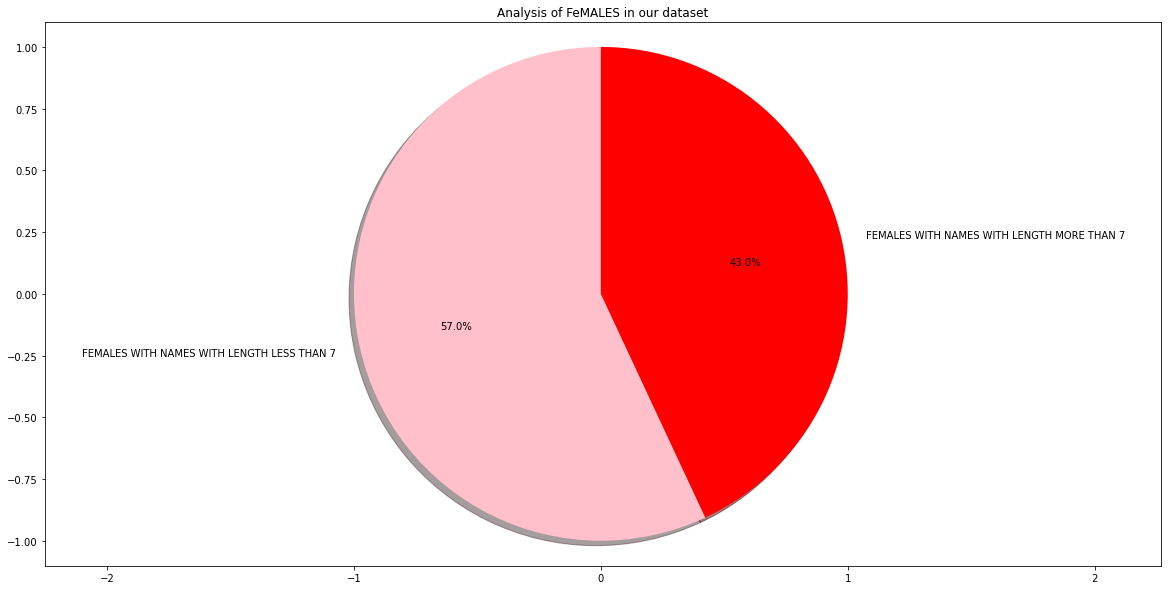

In [28]:
fig1, ax1 = plt.subplots(figsize=(20,10))
names=['MALES WITH NAMES WITH LENGTH LESS THAN 7','MALES WITH NAMES WITH LENGTH MORE THAN 7']
ax1.pie([msl,m-msl], labels=names, autopct='%1.1f%%',
        shadow=True, startangle=90,frame=True,colors=['Orange','Yellow'])
ax1.set_title("Analysis of MALES in our dataset")

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()



fig1, ax1 = plt.subplots(figsize=(20,10))
names=['FEMALES WITH NAMES WITH LENGTH LESS THAN 7','FEMALES WITH NAMES WITH LENGTH MORE THAN 7']
ax1.pie([vsl,f-vsl], labels=names, autopct='%1.1f%%',
        shadow=True, startangle=90,frame=True,colors=['Pink','Red'])
ax1.set_title("Analysis of FeMALES in our dataset")

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()






The difference between the names with short and long lengths is quite high.
# Thus this can be used as our basis of prediction of gender.

# PREDICTION-With the help of *DecisionTreeClassifier.*

**Currently we shall be using the length and vowel end basis of classification.**

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
df['Gender']=pd.get_dummies(df['Gender'])


In [30]:
import pandas as pd
df['Vowel/Consonant End']=pd.get_dummies(df['Vowel/Consonant End'])
df['Short/Long Name']=pd.get_dummies(df['Short/Long Name'])
df['Vowel/Consonant Start']=pd.get_dummies(df['Vowel/Consonant Start'])

Data frame after getting categorical values as dummies.

In [48]:
df

,Id,Name,Year,Gender,Count,Vowel/Consonant End,Vowel/Consonant Start,Short/Long Name
0,1,Mary,1880,1,7065,1,1,0
1,2,Anna,1880,1,2604,0,0,0
2,3,Emma,1880,1,2003,0,0,0
3,4,Elizabeth,1880,1,1939,1,0,1
4,5,Minnie,1880,1,1746,0,1,0
...,...,...,...,...,...,...,...,...
1825428,1825429,Zykeem,2014,0,5,1,1,0
1825429,1825430,Zymeer,2014,0,5,1,1,0
1825430,1825431,Zymiere,2014,0,5,0,1,1
1825431,1825432,Zyran,2014,0,5,1,1,0


In [37]:
trains=df[['Gender','Vowel/Consonant End','Short/Long Name']]
trains.head

train, test = train_test_split(trains, test_size = 0.20)

In [38]:
clf = DecisionTreeClassifier()
clf.fit(train[['Vowel/Consonant End','Short/Long Name']],train[['Gender']])
res=clf.predict(test[['Vowel/Consonant End','Short/Long Name']])
print(res)

[1 0 1 ... 0 0 1]


In [39]:
accuracy_score(test["Gender"], res)

0.7090529106760854

# A quite acceptable accuracy of around 71% is achieved. 

In [41]:
from sklearn import tree
with open("/kaggle/working/decidenames.dot", "w") as dot_file:
    dot_file = tree.export_graphviz(clf,
                            feature_names=["Vowel/Consonant End", "Short/Long Name"], out_file=dot_file)

# It’s now time to visualize our decision tree. We open the decidenames.dot file as..

In [42]:
!dot -Tpng decidenames.dot -o tree_limited.png -Gdpi=600

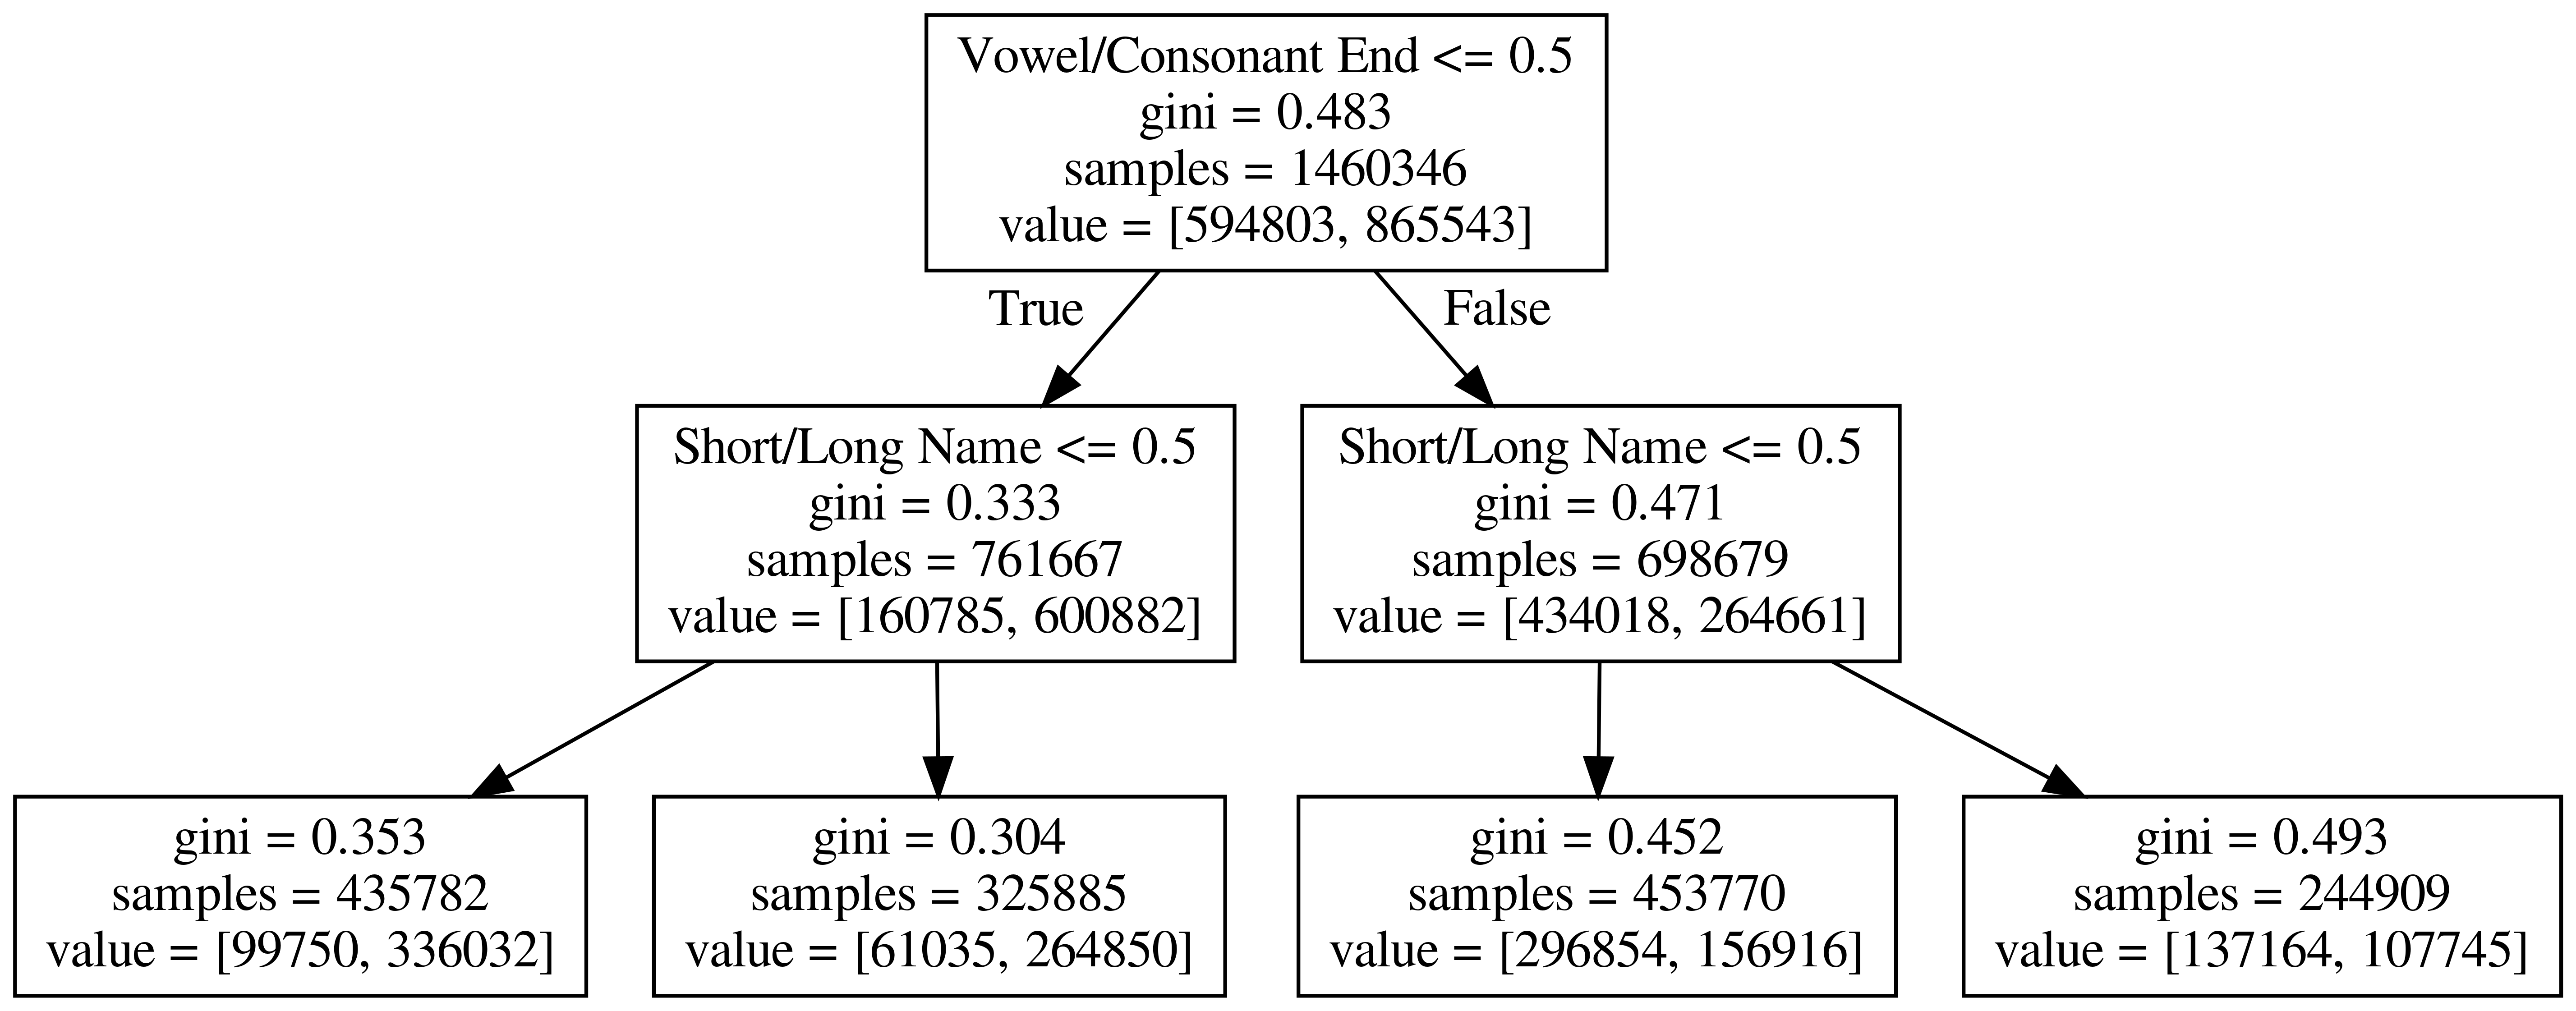

In [43]:
from IPython.display import Image
Image(filename = 'tree_limited.png')

# The accuracy of the model can be enhanced by using more classification techniques and defining more and more basis for the same.

# *Suggest better classification model or criteria's which can enhance the accuracy in the comment section and do upvote.*